# Negation

In [ ]:
import spacy
from spacy import displacy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import en_core_web_sm
import os

In [ ]:
ANN_PATH = os.path.dirname(os.getcwd()) + "\\Annotation\\"

def conditions(s):
    doc = nlp(s)
    negation = [tok for tok in doc if tok.dep_ == 'neg']
    return(len(negation))

nlp = en_core_web_sm.load()
df_ann = pd.read_csv(ANN_PATH+"Avoidance_annotated.csv")
df_ann['negations'] = df_ann['text_a'].apply(conditions)

In [4]:
def conditions_first2(s):
    doc = nlp(s)
    sents = list(doc.sents)
    if len(sents) > 2:
        ss = sents[0].string.strip() + sents[1].string.strip()
        doc = nlp(ss)
    negation = [tok for tok in doc if tok.dep_ == 'neg']
    return(len(negation))

df_ann['negations2'] = df_ann['text_a'].apply(conditions_first2)

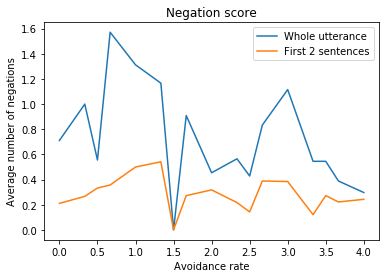

In [5]:
import numpy as np

df_ann.groupby('avoid_rate_avg')['negations'].mean().plot()
df_ann.groupby('avoid_rate_avg')['negations2'].mean().plot()

plt.title('Negation score')
plt.xlabel('Avoidance rate')
plt.ylabel('Average number of negations')
plt.legend(['Whole utterance', 'First 2 sentences'], loc='best')

No correlation found between the average number of negation and avoidance rate. 
The low point at avoidance rate 1.5 can be explained by small number of examples (3) in the data. 

In [6]:
df_fight = pd.read_csv(ANN_PATH+"Avoidance_annotated_avoided_fight.csv")
df_flight = pd.read_csv(ANN_PATH+"Avoidance_annotated_avoided_flight.csv")
df_fight['negations'] = df_fight['text_a'].apply(conditions)
df_flight['negations'] = df_flight['text_a'].apply(conditions)

In [7]:
df_fight['negations2'] = df_fight['text_a'].apply(conditions_first2)
df_flight['negations2'] = df_flight['text_a'].apply(conditions_first2)

In [8]:
print('Average negation for fight and flight:')
print(df_fight['negations'].mean())
print(df_flight['negations'].mean())
print()
print('Average negation (first 2 sentences) for fight and flight:')
print(df_fight['negations2'].mean())
print(df_flight['negations2'].mean())

Average negation for fight and flight:
0.631578947368421
0.5343511450381679

Average negation (first 2 sentences) for fight and flight:
0.3684210526315789
0.17557251908396945


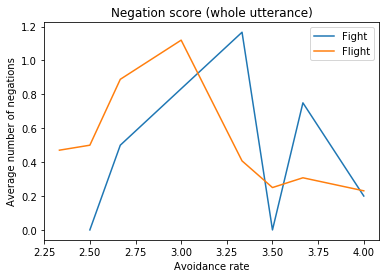

In [9]:
df_fight.groupby('avoid_rate_avg')['negations'].mean().plot()
df_flight.groupby('avoid_rate_avg')['negations'].mean().plot()

plt.title('Negation score (whole utterance)')
plt.xlabel('Avoidance rate')
plt.ylabel('Average number of negations')
plt.legend(['Fight', 'Flight'], loc='best')

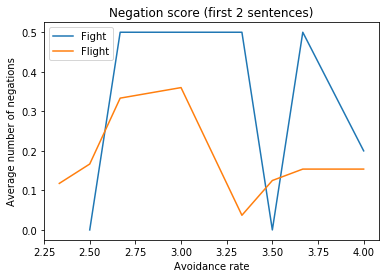

In [10]:
df_fight.groupby('avoid_rate_avg')['negations2'].mean().plot()
df_flight.groupby('avoid_rate_avg')['negations2'].mean().plot()

plt.title('Negation score (first 2 sentences)')
plt.xlabel('Avoidance rate')
plt.ylabel('Average number of negations')
plt.legend(['Fight', 'Flight'], loc='best')

Possible correlation found between the average number of negation and avoidance type: utterances of the type 'fight' tend to contain more negation on average than of the type 'flight'. The low point for the 'fight' type at avoidance rate 3.5 can be explained by small number of examples (1) in the data.

# Sentiment analysis

In [11]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import tokenize

sid = SentimentIntensityAnalyzer()

def sentiment_score(s):
    sentences = tokenize.sent_tokenize(s)
    scores = []
    for sentence in sentences:
        scores.append(sid.polarity_scores(sentence)['compound'])
    return sum(scores)/len(scores)

def sentiment_score2(s):
    sentences = tokenize.sent_tokenize(s)
    scores = []
    for sentence in sentences[:2]:
        scores.append(sid.polarity_scores(sentence)['compound'])
    return sum(scores)/len(scores)

df_ann['sentiment'] = df_ann['text_a'].apply(sentiment_score)
df_ann['sentiment2'] = df_ann['text_a'].apply(sentiment_score2)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Yana\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


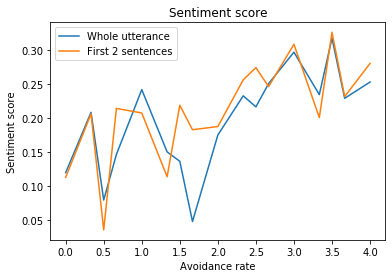

In [12]:
df_ann.groupby('avoid_rate_avg')['sentiment'].mean().plot()
df_ann.groupby('avoid_rate_avg')['sentiment2'].mean().plot()

plt.title('Sentiment score')
plt.xlabel('Avoidance rate')
plt.ylabel('Sentiment score')
plt.legend(['Whole utterance', 'First 2 sentences'], loc='best')

More avoidance -> more positive sentiment score

In [13]:
df_fight['sentiment'] = df_fight['text_a'].apply(sentiment_score)
df_fight['sentiment2'] = df_fight['text_a'].apply(sentiment_score2)

df_flight['sentiment'] = df_flight['text_a'].apply(sentiment_score)
df_flight['sentiment2'] = df_flight['text_a'].apply(sentiment_score2)

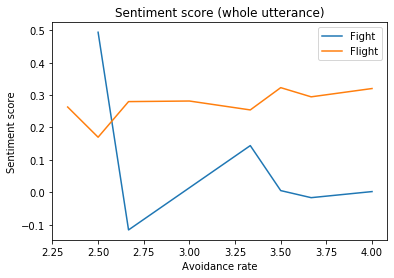

In [14]:
df_fight.groupby('avoid_rate_avg')['sentiment'].mean().plot()
df_flight.groupby('avoid_rate_avg')['sentiment'].mean().plot()

plt.title('Sentiment score (whole utterance)')
plt.xlabel('Avoidance rate')
plt.ylabel('Sentiment score')
plt.legend(['Fight', 'Flight'], loc='best')

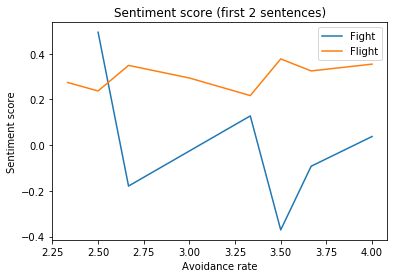

In [15]:
ax1 = df_fight.groupby('avoid_rate_avg')['sentiment2'].mean().plot()
ax2 = df_flight.groupby('avoid_rate_avg')['sentiment2'].mean().plot()

plt.title('Sentiment score (first 2 sentences)')
plt.xlabel('Avoidance rate')
plt.ylabel('Sentiment score')
plt.legend(['Fight', 'Flight'], loc='best')

Clearly, the utterances labeled 'fight' have more negative sentiment score than the utterances labeled 'flight'.

# Politeness

In [32]:
import convokit
import os
from convokit import Corpus, Speaker, Utterance
from convokit import download

CORP_PATH = os.path.dirname(os.getcwd())+'\\Corpora\\'

corpus_all = Corpus(CORP_PATH+'full-avoidance-corpus')

In [33]:
from convokit import TextParser

parser = TextParser(verbosity=1000)
corpus_all = parser.transform(corpus_all)

844/844 utterances processed


In [34]:
from convokit import PolitenessStrategies

ps = PolitenessStrategies()
corpus_all = ps.transform(corpus_all, markers=True)

In [35]:
# Downloading the wikipedia portion of annotated data
wiki_corpus = Corpus(download("wikipedia-politeness-corpus"))
wiki_corpus = parser.transform(wiki_corpus)
wiki_corpus = ps.transform(wiki_corpus, markers=True)

Dataset already exists at C:\Users\Yana\.convokit\downloads\wikipedia-politeness-corpus
1000/4353 utterances processed
2000/4353 utterances processed
3000/4353 utterances processed
4000/4353 utterances processed
4353/4353 utterances processed


In [36]:
from sklearn import svm
from scipy.sparse import csr_matrix
from sklearn.metrics import classification_report
from convokit import Classifier

train_corpus = Corpus(utterances=[utt for utt in wiki_corpus.iter_utterances() if utt.meta["Binary"] != 0])

In [37]:
clf = Classifier(obj_type="utterance", 
                        pred_feats=["politeness_strategies"], 
                        labeller=lambda utt: utt.meta['Binary'] == 1)
clf.fit(train_corpus)

In [38]:
test_pred = clf.transform(corpus_all)
df_pred = clf.summarize(test_pred)
df_pred.head()

,prediction,pred_score
id,,
1189_3.a,0,0.029609
t1_c13u7b2,0,0.038570
2007-06-06b.254.4,0,0.038601
1982-10-19a.215.0,0,0.038601
2013-06-04b.1376.9,0,0.038601


In [39]:
df_ann = pd.read_csv(ANN_PATH + "Avoidance_annotated.csv")
df_ann = pd.merge(df_ann, df_pred, left_on='id_a', right_on='id', how='left')

Text(0, 0.5, 'Politeness score')

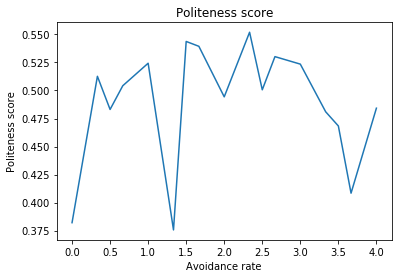

In [40]:
df_ann.groupby('avoid_rate_avg')['pred_score'].mean().plot()

plt.title('Politeness score')
plt.xlabel('Avoidance rate')
plt.ylabel('Politeness score')

Once again, there is no correlation between avoidance rate and politeness score.

In [41]:
df_fight = pd.read_csv(ANN_PATH + "Avoidance_annotated_avoided_fight.csv")
df_fight = pd.merge(df_fight, df_pred, left_on='id_a', right_on='id', how='left')
df_flight = pd.read_csv(ANN_PATH + "Avoidance_annotated_avoided_flight.csv")
df_flight = pd.merge(df_flight, df_pred, left_on='id_a', right_on='id', how='left')

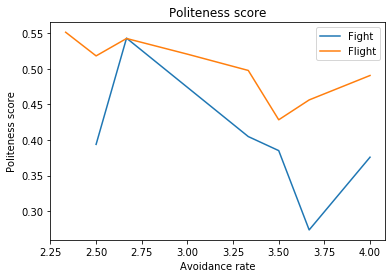

In [42]:
df_fight.groupby('avoid_rate_avg')['pred_score'].mean().plot()
df_flight.groupby('avoid_rate_avg')['pred_score'].mean().plot()

plt.title('Politeness score')
plt.xlabel('Avoidance rate')
plt.ylabel('Politeness score')
plt.legend(['Fight', 'Flight'], loc='best')

'Fight' utterances are less polite than 'Flight utterances'

## Queries in answers

Text(0, 0.5, 'Average number of q-marks')

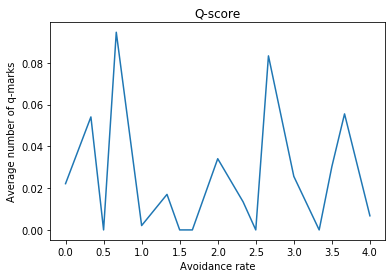

In [43]:
def conditions(s):
    sentences = tokenize.sent_tokenize(s)
    return(s.count('?')/len(sentences))

df_ann = pd.read_csv(ANN_PATH + "Avoidance_annotated.csv")
df_ann['q_marks'] = df_ann['text_a'].apply(conditions)

import numpy as np
import matplotlib.pyplot as plt

df_ann.groupby('avoid_rate_avg')['q_marks'].mean().plot()

plt.title('Q-score')
plt.xlabel('Avoidance rate')
plt.ylabel('Average number of q-marks')